## CARIACO Niskin bottle time series data from BCO-DMO
This notebook walks through building an ERDDAP url for a specific dataset, and plotting a time series of some of the data.

Author: Mathew Biddle (mbiddle@whoi.edu)

In [1]:
from erddapy import ERDDAP
import pandas as pd
%matplotlib inline

### Start building the ERDDAP request

In [2]:
server='http://erddap.bco-dmo.org/erddap'

e = ERDDAP(
    server=server,
    protocol='tabledap',
    response = 'csv'
    ) 

### Go out and get the data for a specific dataset

In this example, we happen to know the dataset ID is **bcodmo_dataset_3093** ([www.bco-dmo.org/dataset/3093](www.bco-dmo.org/dataset/3093)). So, we build the ERDDAP url for the dataset ID of interest. Then, we import the data into a pandas DataFrame.

In [3]:
e.dataset_id = 'bcodmo_dataset_3093'
print(e.get_download_url())
df = e.to_pandas(header=[0,1])
df.describe()

http://erddap.bco-dmo.org/erddap/tabledap/bcodmo_dataset_3093.csv?


,Cruise_number,Leg,Day,Month,Year,latitude,longitude,Hydro_cast_no,Depth_target,depth,...,q_DOC,TOC,q_TOC,PrimaryProductivity,q_PrimaryProductivity,Chlorophyll,q_Chlorophyll,Phaeopigments,q_Phaeopigments,Bio_cast_no
,integer (nnn),integer (n),unitless,unitless,unitless,degrees_north,degrees_east,integer (n),meters (m),m,...,dimensionless,micromolar (\u03bcM),dimensionless,milligrams Carbon/meter^3/hour (mgC/m^3/hr),dimensionless,milligrams/meter^3 (mg/m^3),dimensionless,milligrams/meter^3 (mg/m^3),dimensionless,integer (n)
count,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4365.000000,4393.000000,4392.000000,...,4394.000000,452.000000,4394.000000,1658.000000,4394.000000,1829.000000,4394.000000,1828.000000,4394.000000,1839.000000
mean,115.213018,1.152481,9.777651,6.497041,2005.294492,10.501043,-64.666233,1.585796,264.183018,264.628464,...,0.161129,125.672434,0.025262,1.922717,0.001365,0.498776,0.000228,0.427402,0.000228,3.965198
std,67.356840,0.471312,4.332676,3.480768,5.968788,0.012767,0.021963,0.645637,316.681413,316.525270,...,0.367692,406.303160,0.156937,4.034208,0.036932,1.031748,0.015086,0.532703,0.015086,0.341038
min,1.000000,1.000000,1.000000,1.000000,1995.000000,10.492000,-64.735000,0.000000,1.000000,0.349000,...,0.000000,24.891700,0.000000,0.000000,0.000000,0.010000,0.000000,0.020000,0.000000,0.000000
25%,56.000000,1.000000,7.000000,3.000000,2000.000000,10.499000,-64.667000,1.000000,35.000000,35.528500,...,0.000000,56.814200,0.000000,0.095373,0.000000,0.120000,0.000000,0.126655,0.000000,4.000000
50%,114.000000,1.000000,10.000000,6.000000,2005.000000,10.500000,-64.667000,2.000000,160.000000,161.330500,...,0.000000,63.974950,0.000000,0.833984,0.000000,0.200000,0.000000,0.246724,0.000000,4.000000
75%,174.000000,1.000000,12.000000,10.000000,2010.000000,10.500000,-64.666000,2.000000,350.000000,350.200250,...,0.000000,81.595825,0.000000,1.865230,0.000000,0.407875,0.000000,0.529569,0.000000,4.000000
max,232.000000,4.000000,29.000000,12.000000,2017.000000,10.683000,-64.367000,5.000000,1320.000000,1351.000000,...,1.000000,6538.330000,1.000000,65.445000,1.000000,24.781200,1.000000,7.536750,1.000000,6.000000


### Make some plots
Here we assign the 'time' variable to the index, and make time series plots of a few of the variables.

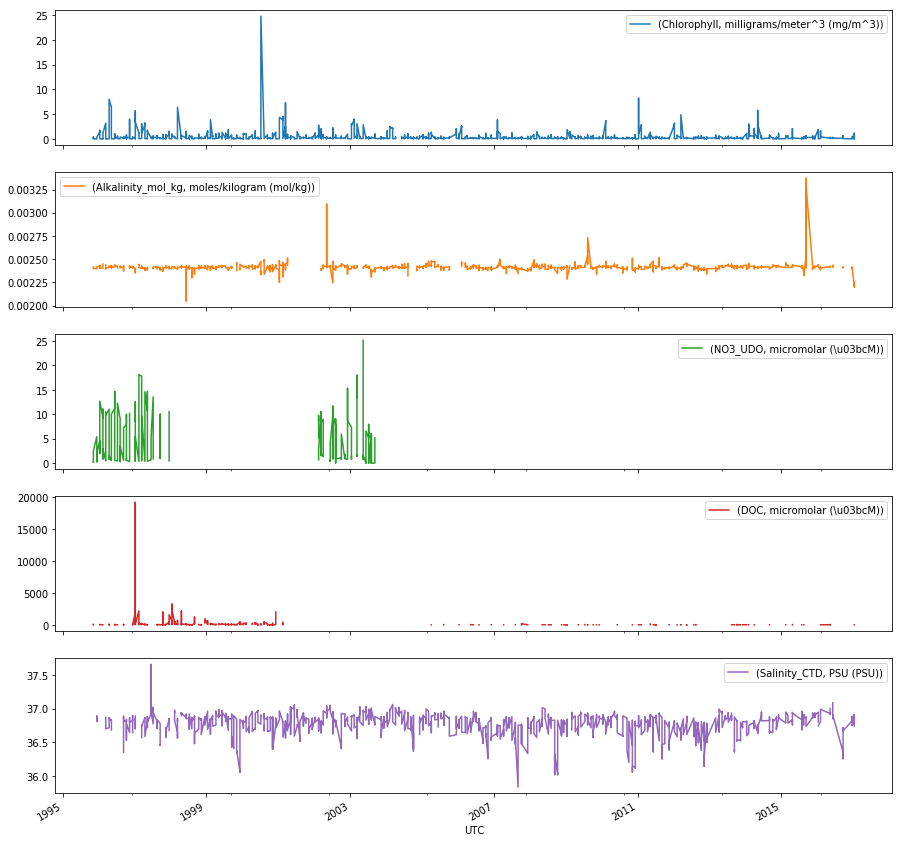

In [4]:
df.index = pd.to_datetime(df['time']['UTC'], infer_datetime_format=True)

df[['Chlorophyll','Alkalinity_mol_kg','NO3_UDO','DOC','Salinity_CTD']].plot(subplots=True, figsize=(15,16));